In [135]:
#Given the China GDP datasets from 1960 to 2014, need to findout which ML model is going to fit this data.
#also Visualise, split data into train and test sets, try to predict GDP on test set and findout MAE, MSE
#and accuracy of the model.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
df=pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [16]:
# now we need to plot bivariate graph of the data points. The independent variable X (Year) on the x-axis, and the dependent variable y (Value) on the y-axis.

In [17]:
x, y=(df["Year"], df["Value"])

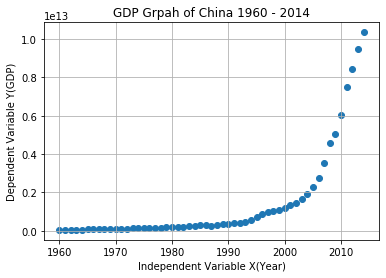

In [18]:
plt.scatter(x, y)
plt.xlabel("Independent Variable X(Year)")
plt.ylabel("Dependent Variable Y(GDP)")
plt.title("GDP Grpah of China 1960 - 2014")
plt.grid()
plt.show()

In [19]:
# this graph show similar to Exponential or logistic

In [20]:
# at starting chinal gdp was slow but from 2005 onwards, the growth is very significant then it decelerate slightly after 2010 to 2014

In [21]:
# since its looks like logistic we can choose logistic function as we know it has the property of starting slow, increasing growth in the middle and decreasing again at the end.

In [22]:
# so make a sigmoid or logistic function 

In [23]:
def sigmoid(X, beta_1, beta_2):
    y=1/(1+np.exp(-beta_1*(X-beta_2)))
    return y

In [24]:
#Beta_1 controls the steepness of the curve, while Beta_2 slides the curve on the x-axis

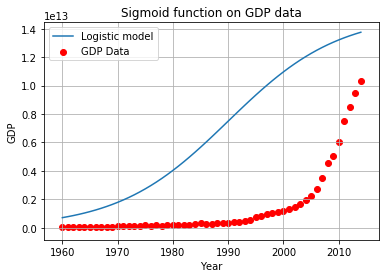

In [25]:
Beta_1=0.10
Beta_2=1990
y_pred=sigmoid(x, Beta_1, Beta_2)
plt.plot(x, y_pred*15000000000000, label="Logistic model")
plt.scatter(x, y, label="GDP Data", color="red")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Sigmoid function on GDP data")
plt.legend()
plt.grid()
plt.show()

In [26]:
#now lets normalize our variables because our features has different range.
#Normalization is a technique often applied as part of data preparation for machine learning.
#The goal of normalization is to change the values of numeric columns in the dataset to a common scale,
#without distorting differences in the ranges of values.

In [85]:
x_data=x/max(x)
y_data=y/max(y)

In [28]:
#now the next task is to find our best parameters for non-linear or logistic model.
# here we are going to use curve_fit() method from scipy library.
#curve_fit() uses non-linear least square estimation to fit the sigmoid function.

In [29]:
from scipy.optimize import curve_fit

In [30]:
p_opt, p_cov=curve_fit(sigmoid, x_data, y_data)
print("beta_1: {}, beta_2: {}".format(p_opt[0], p_opt[1])) #beta_1 and beta_2 are the parameters of the sigmoidor logistic function.

beta_1: 690.4517129721773, beta_2: 0.9972071272534901


In [31]:
#Now we are going to use these parameters to fit our model or in order to minimise the sum of squared difference
#between each prediction and its corresponding actual point.

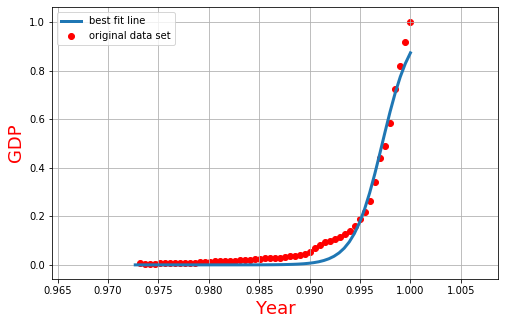

In [55]:
m=np.linspace(1960, 2015, 55)
m=m/max(m)
n=sigmoid(m, p_opt[0], p_opt[1])
plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data, label="original data set", color="red")
plt.plot(m, n, linewidth=3.0, label="best fit line")
plt.xlabel("Year", color="red", fontsize=18)
plt.ylabel("GDP", color="red",fontsize=18)
plt.legend()
plt.grid()
plt.show()

In [57]:
# We can see it looks pretty good fit predicted line over the original data

In [58]:
# now lets evaluate our model

In [59]:
#first we will split our data into training and testing data sets.

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

In [77]:
#now next we need to check parameters using training sets.

In [78]:
p_opt, p_con = curve_fit(sigmoid, x_train, y_train)
print("Ideal parameters are: ", p_opt)

Ideal parameters are:  [745.57991363   0.99725863]


In [79]:
#now we make prediction using test set

In [90]:
y_prediction=sigmoid(x_test, *p_opt)
# *popt means unpack popt into popt[0] and popt[1]

In [91]:
print(y_prediction)

51    7.177467e-01
0     1.606191e-08
27    3.520258e-04
42    8.328902e-02
35    6.760564e-03
44    1.600201e-01
6     1.480636e-07
40    4.153197e-02
24    1.159716e-04
3     4.876663e-08
22    5.531303e-05
Name: Year, dtype: float64


# Evaluation

In [95]:
mean_absolute_error=np.mean(np.absolute(y_prediction- y_test))
mean_squared_error=np.mean(np.absolute(y_prediction - y_test)**2)

In [128]:
print("Mean Absolute Error is: %.2f" % mean_absolute_error)
print("Mean Squared Error is: %.2f" % mean_squared_error)

Mean Absolute Error is: 0.03
Mean Squared Error is: 0.00


In [129]:
#Next let's check the R2 score, The coefficient of determination

In [130]:
from sklearn.metrics import r2_score

In [134]:
r_score = r2_score(y_prediction, y_test)
print("%.2f" % r_score)
#our model is 97% accurate on the test data.

0.97


In [132]:
#MAE = 0.03; MSE = 0.00 ; R2-score = 0.97 (97%)